In [1]:
#Analysis of DEA Opioid Data for Maricopa County, AZ

In [2]:
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [3]:
pwd


'/Users/lindalambert/Desktop/Jupityer notebook learning files'

In [4]:
#Import File
path=('/Users/lindalambert/Desktop/arcos-az-maricopa-04013-itemized.tsv')
df = pd.read_csv(path,sep='\t')

/Users/lindalambert/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (3,22,26,27) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
#Describe data
df.describe()

,REPORTER_ZIP,BUYER_ZIP,DRUG_CODE,QUANTITY,UNIT,CORRECTION_NO,STRENGTH,TRANSACTION_DATE,CALC_BASE_WT_IN_GM,DOSAGE_UNIT,TRANSACTION_ID,MME_Conversion_Factor,dos_str
count,2.296626e+06,2.296626e+06,2.296626e+06,2.296626e+06,0.0,1.181000e+03,826395.000000,2.296626e+06,2.296626e+06,2.296626e+06,2.296626e+06,2.296626e+06,2.289523e+06
mean,8.769437e+04,8.519780e+04,9.167908e+03,2.802095e+00,NaN,1.044475e+07,0.009664,6.767611e+06,3.521439e+00,4.374113e+02,4.607707e+08,1.250921e+00,1.258555e+01
std,7.735687e+03,1.266119e+02,2.499984e+01,8.814085e+00,NaN,1.165234e+07,2.803755,3.437381e+06,7.235346e+00,9.816777e+02,4.876575e+08,2.499984e-01,1.431593e+01
min,1.434000e+03,8.500300e+04,9.143000e+03,1.000000e+00,NaN,1.100000e+01,0.000000,1.012006e+06,9.081000e-03,2.000000e+00,1.000000e+00,1.000000e+00,2.500000e+00
25%,8.535300e+04,8.504300e+04,9.143000e+03,1.000000e+00,NaN,7.034000e+03,0.000000,4.052006e+06,6.723750e-01,1.000000e+02,1.673300e+04,1.000000e+00,5.000000e+00
50%,8.535300e+04,8.522500e+04,9.143000e+03,1.000000e+00,NaN,1.501600e+04,0.000000,7.062006e+06,1.793000e+00,2.000000e+02,1.277340e+05,1.500000e+00,7.500000e+00
75%,9.255100e+04,8.530100e+04,9.193000e+03,3.000000e+00,NaN,2.357006e+07,0.000000,1.004201e+07,3.586000e+00,5.000000e+02,9.110100e+08,1.500000e+00,1.000000e+01
max,9.842400e+04,8.539600e+04,9.193000e+03,2.268000e+03,NaN,2.370774e+07,1000.000000,1.231201e+07,7.745760e+02,2.220000e+05,4.200000e+09,1.500000e+00,4.000000e+02


In [6]:
# mean of the Quantity
df.loc[:,"QUANTITY"].mean()

2.8020948992130195

In [7]:
# mean of the Dosage Units
df.loc[:,"DOSAGE_UNIT"].mean()

437.4113011870457

In [8]:
#List data types
df.dtypes

REPORTER_DEA_NO           object
REPORTER_BUS_ACT          object
REPORTER_NAME             object
REPORTER_ADDL_CO_INFO     object
REPORTER_ADDRESS1         object
REPORTER_ADDRESS2         object
REPORTER_CITY             object
REPORTER_STATE            object
REPORTER_ZIP               int64
REPORTER_COUNTY           object
BUYER_DEA_NO              object
BUYER_BUS_ACT             object
BUYER_NAME                object
BUYER_ADDL_CO_INFO        object
BUYER_ADDRESS1            object
BUYER_ADDRESS2            object
BUYER_CITY                object
BUYER_STATE               object
BUYER_ZIP                  int64
BUYER_COUNTY              object
TRANSACTION_CODE          object
DRUG_CODE                  int64
NDC_NO                    object
DRUG_NAME                 object
QUANTITY                 float64
UNIT                     float64
ACTION_INDICATOR          object
ORDER_FORM_NO             object
CORRECTION_NO            float64
STRENGTH                 float64
TRANSACTIO

In [9]:
#Most common ingredient
df.loc[:,"Ingredient_Name"].mode()

0    OXYCODONE HYDROCHLORIDE
dtype: object

In [10]:
#Most common drug
df.loc[:,"DRUG_NAME"].mode()

0    OXYCODONE
dtype: object

In [11]:
# Most prevalent zip code of buyers
df.loc[:,"BUYER_ZIP"].mode()

0    85308
dtype: int64

In [12]:
#Most common city
df.loc[:,"BUYER_CITY"].mode()

0    PHOENIX
dtype: object

In [13]:
#Most common pharmacy
df.loc[:,"BUYER_NAME"].mode()

0    WALGREEN ARIZONA DRUG CO.
dtype: object

In [14]:
# Most prevalent zip code of reporters (distributors)
df.loc[:,"REPORTER_ZIP"].mode()

0    85353
dtype: int64

In [15]:
#Most common distributor city
df.loc[:,"REPORTER_CITY"].mode()

0    TOLLESON
dtype: object

In [16]:
#Most common distributor
df.loc[:,"REPORTER_NAME"].mode()

0    WALGREEN CO
dtype: object

In [17]:
#List missing data for first five rows
missing_data = df.isnull()
missing_data.head(5)

,REPORTER_DEA_NO,REPORTER_BUS_ACT,REPORTER_NAME,REPORTER_ADDL_CO_INFO,REPORTER_ADDRESS1,REPORTER_ADDRESS2,REPORTER_CITY,REPORTER_STATE,REPORTER_ZIP,REPORTER_COUNTY,...,DOSAGE_UNIT,TRANSACTION_ID,Product_Name,Ingredient_Name,Measure,MME_Conversion_Factor,Combined_Labeler_Name,Revised_Company_Name,Reporter_family,dos_str
0,False,False,False,True,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,True,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,True,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,True,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [18]:
# List data with missing values
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")   

REPORTER_DEA_NO
False    2296626
Name: REPORTER_DEA_NO, dtype: int64

REPORTER_BUS_ACT
False    2296626
Name: REPORTER_BUS_ACT, dtype: int64

REPORTER_NAME
False    2296626
Name: REPORTER_NAME, dtype: int64

REPORTER_ADDL_CO_INFO
True     2282221
False      14405
Name: REPORTER_ADDL_CO_INFO, dtype: int64

REPORTER_ADDRESS1
False    2296626
Name: REPORTER_ADDRESS1, dtype: int64

REPORTER_ADDRESS2
False    1635818
True      660808
Name: REPORTER_ADDRESS2, dtype: int64

REPORTER_CITY
False    2296626
Name: REPORTER_CITY, dtype: int64

REPORTER_STATE
False    2296626
Name: REPORTER_STATE, dtype: int64

REPORTER_ZIP
False    2296626
Name: REPORTER_ZIP, dtype: int64

REPORTER_COUNTY
False    2296626
Name: REPORTER_COUNTY, dtype: int64

BUYER_DEA_NO
False    2296626
Name: BUYER_DEA_NO, dtype: int64

BUYER_BUS_ACT
False    2296626
Name: BUYER_BUS_ACT, dtype: int64

BUYER_NAME
False    2296626
Name: BUYER_NAME, dtype: int64

BUYER_ADDL_CO_INFO
False    1450254
True      846372
Name: BUYER_ADDL_

In [19]:
df.head

<bound method NDFrame.head of         REPORTER_DEA_NO REPORTER_BUS_ACT             REPORTER_NAME  \
0             PA0021179      DISTRIBUTOR              APOTHECA INC   
1             PA0021179      DISTRIBUTOR              APOTHECA INC   
2             PA0021179      DISTRIBUTOR              APOTHECA INC   
3             PA0021179      DISTRIBUTOR              APOTHECA INC   
4             PA0021179      DISTRIBUTOR              APOTHECA INC   
5             PA0021179      DISTRIBUTOR              APOTHECA INC   
6             PA0021179      DISTRIBUTOR              APOTHECA INC   
7             PA0021179      DISTRIBUTOR              APOTHECA INC   
8             PA0021179      DISTRIBUTOR              APOTHECA INC   
9             PA0021179      DISTRIBUTOR              APOTHECA INC   
10            PA0021179      DISTRIBUTOR              APOTHECA INC   
11            PA0021179      DISTRIBUTOR              APOTHECA INC   
12            PA0021179      DISTRIBUTOR              APOTHE

In [20]:
#mode of quantity
df.loc[:,"QUANTITY"].mode()

0    1.0
dtype: float64

In [21]:
#mean of quantity
df.loc[:,"QUANTITY"].mean()

2.8020948992130195

In [22]:
#modify buyer to string data type
df.BUYER_ZIP = df.BUYER_ZIP.astype(str)
#list of datatypes
df.dtypes


REPORTER_DEA_NO           object
REPORTER_BUS_ACT          object
REPORTER_NAME             object
REPORTER_ADDL_CO_INFO     object
REPORTER_ADDRESS1         object
REPORTER_ADDRESS2         object
REPORTER_CITY             object
REPORTER_STATE            object
REPORTER_ZIP               int64
REPORTER_COUNTY           object
BUYER_DEA_NO              object
BUYER_BUS_ACT             object
BUYER_NAME                object
BUYER_ADDL_CO_INFO        object
BUYER_ADDRESS1            object
BUYER_ADDRESS2            object
BUYER_CITY                object
BUYER_STATE               object
BUYER_ZIP                 object
BUYER_COUNTY              object
TRANSACTION_CODE          object
DRUG_CODE                  int64
NDC_NO                    object
DRUG_NAME                 object
QUANTITY                 float64
UNIT                     float64
ACTION_INDICATOR          object
ORDER_FORM_NO             object
CORRECTION_NO            float64
STRENGTH                 float64
TRANSACTIO

In [23]:
#mean buyer dosage_unit per zip
df_gptest = df[['BUYER_ZIP','DOSAGE_UNIT']]
grouped_test1 = df_gptest.groupby(['BUYER_ZIP'],as_index=False).mean()
grouped_test1

,BUYER_ZIP,DOSAGE_UNIT
0,85003,216.479788
1,85004,529.851670
2,85006,486.328297
3,85007,1030.517928
4,85008,525.834605
5,85009,232.879847
6,85012,558.041806
7,85013,366.689041
8,85014,398.868453
9,85015,471.597973


In [24]:
#sort by descending rank order with just top zip codes with top five dosage units
xdata=grouped_test1.sort_values(by="DOSAGE_UNIT",ascending=False).head() 

In [25]:
print(xdata)


   BUYER_ZIP  DOSAGE_UNIT
32     85043  2028.360666
82     85284  1416.743813
3      85007  1030.517928
59     85226   750.391143
36     85051   626.307019


In [26]:
#mean dosage_unit per zip
df_gptestr = df[['REPORTER_ZIP','DOSAGE_UNIT']]
grouped_test2 = df_gptestr.groupby(['REPORTER_ZIP'],as_index=False).mean()
grouped_test2

,REPORTER_ZIP,DOSAGE_UNIT
0,1434,200.000000
1,6051,350.000000
2,6607,400.000000
3,7035,100.000000
4,7052,7.904762
5,7072,777.777778
6,7094,450.000000
7,8054,52.000000
8,8873,42.166667
9,11357,705.263158


In [27]:
#Correlation of data
df.corr()

,REPORTER_ZIP,DRUG_CODE,QUANTITY,UNIT,CORRECTION_NO,STRENGTH,TRANSACTION_DATE,CALC_BASE_WT_IN_GM,DOSAGE_UNIT,TRANSACTION_ID,MME_Conversion_Factor,dos_str
REPORTER_ZIP,1.000000,0.016893,-0.111781,NaN,-0.228463,-0.002805,0.007664,-0.010356,-0.021799,-0.317448,-0.016893,0.037341
DRUG_CODE,0.016893,1.000000,-0.102234,NaN,0.032170,0.004263,-0.005420,-0.238422,-0.003823,-0.271636,-1.000000,-0.371074
QUANTITY,-0.111781,-0.102234,1.000000,NaN,-0.282299,0.000051,0.004020,0.358343,0.415195,0.019561,0.102234,-0.002071
UNIT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CORRECTION_NO,-0.228463,0.032170,-0.282299,NaN,1.000000,NaN,0.306336,-0.123107,-0.206718,0.082017,-0.032170,-0.038484
STRENGTH,-0.002805,0.004263,0.000051,NaN,NaN,1.000000,0.001263,-0.001231,-0.000409,-0.002409,-0.004263,-0.001742
TRANSACTION_DATE,0.007664,-0.005420,0.004020,NaN,0.306336,0.001263,1.000000,0.002646,0.001273,-0.007062,0.005420,-0.004316
CALC_BASE_WT_IN_GM,-0.010356,-0.238422,0.358343,NaN,-0.123107,-0.001231,0.002646,1.000000,0.629415,0.014874,0.238422,0.383459
DOSAGE_UNIT,-0.021799,-0.003823,0.415195,NaN,-0.206718,-0.000409,0.001273,0.629415,1.000000,-0.055858,0.003823,-0.078071
TRANSACTION_ID,-0.317448,-0.271636,0.019561,NaN,0.082017,-0.002409,-0.007062,0.014874,-0.055858,1.000000,0.271636,0.052970


In [28]:
%%capture
! pip install seaborn


In [29]:
#import matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 


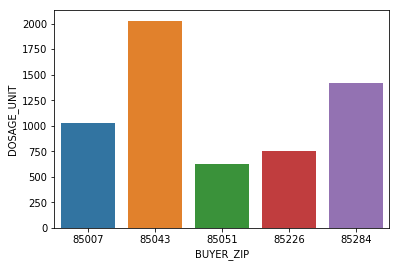

In [30]:
#Dosage Unit by Top 5 Buyer_ZIP
sns.barplot(x="BUYER_ZIP", y="DOSAGE_UNIT", data=xdata)
